<a href="https://colab.research.google.com/github/RoseSarlake/spectral-image/blob/main/White_correction_(Big_colorchecker_%2B_SpecimV10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Copyright (C) 2021 by Dmitry Semenov <dmitry.semenov@uef.fi>
#
# Permission to use, copy, modify, and/or distribute this software for any
# purpose with or without fee is hereby granted.
#
# THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES WITH
# REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF MERCHANTABILITY
# AND FITNESS. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR ANY SPECIAL, DIRECT,
# INDIRECT, OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER RESULTING FROM
# LOSS OF USE, DATA OR PROFITS, WHETHER IN AN ACTION OF CONTRACT, NEGLIGENCE OR
# OTHER TORTIOUS ACTION, ARISING OUT OF OR IN CONNECTION WITH THE USE OR
# PERFORMANCE OF THIS SOFTWARE.

First part

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Read wavelengths from hdr file
hdr_path = '/content/drive/MyDrive/summer school/Lectures+Exercises/LectureExercise #7.2, White correction/Spectral files/BigColorChecker/capture/BigColorChecker.hdr'

f=open(hdr_path, "r")
filelines = f.readlines()
#print(filelines)
f.close()
waves = np.zeros(135,)
n = 0
for i in range(55, 55+135):
  #print(filelines[i])
  waves[n] = float(filelines[i].replace(',',''))
  #print(waves[n])
  n = n + 1
print(waves)    


[ 323.87  328.69  333.51  338.33  343.16  347.99  352.83  357.67  362.52
  367.37  372.22  377.08  381.94  386.8   391.67  396.55  401.43  406.31
  411.2   416.09  420.98  425.88  430.78  435.69  440.6   445.52  450.44
  455.36  460.29  465.22  470.16  475.1   480.05  484.99  489.95  494.9
  499.87  504.83  509.8   514.77  519.75  524.73  529.72  534.71  539.71
  544.7   549.71  554.71  559.73  564.74  569.76  574.78  579.81  584.84
  589.88  594.92  599.96  605.01  610.06  615.12  620.18  625.25  630.31
  635.39  640.47  645.55  650.63  655.72  660.82  665.91  671.02  676.12
  681.23  686.35  691.47  696.59  701.72  706.85  711.98  717.12  722.27
  727.41  732.57  737.72  742.88  748.05  753.22  758.39  763.57  768.75
  773.93  779.12  784.31  789.51  794.71  799.92  805.13  810.34  815.56
  820.78  826.01  831.24  836.48  841.71  846.96  852.21  857.46  862.71
  867.97  873.24  878.5   883.78  889.05  894.33  899.62  904.91  910.2
  915.5   920.8   926.1   931.41  936.72  942.04  947

In [ ]:
# Read image
open_path = '/content/drive/MyDrive/summer school/Lectures+Exercises/LectureExercise #7.2, White correction/Spectral files/BigColorChecker/capture/BigColorChecker.raw'
samples = 2144
bands = 135
lines = 1307

# Read raw
fopen = open(open_path, "rb")
raw_image = np.fromfile(fopen, dtype=np.uint16) 
spectral_image = np.reshape(raw_image, (lines, bands, samples))


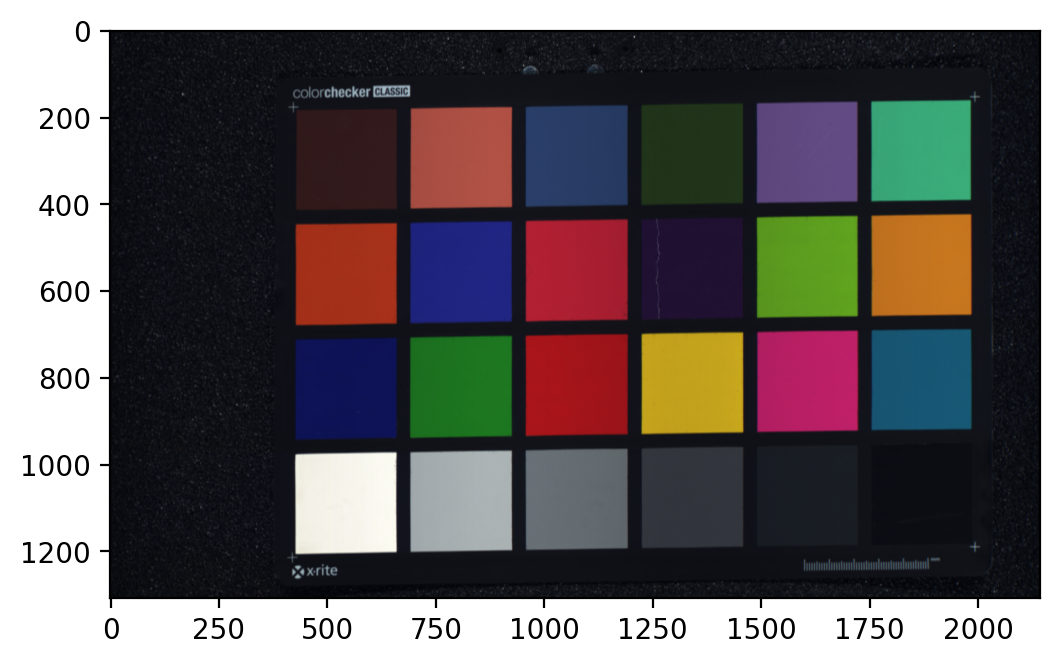

In [ ]:
# Plot RGB preview
plt.rcParams['figure.dpi'] = 100
RGB = np.empty((lines,samples, 3), dtype = np.float32)
ch1 = 64 # Red
ch2 = 43  # Green
ch3 = 25  # Blue
RGB[:,:,0] = spectral_image[:,ch1,:]/ np.amax(spectral_image[:,ch1,:])
RGB[:,:,1] = spectral_image[:,ch2,:]/ np.amax(spectral_image[:,ch2,:])
RGB[:,:,2] = spectral_image[:,ch3,:]/ np.amax(spectral_image[:,ch3,:])
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGB)
plt.show()

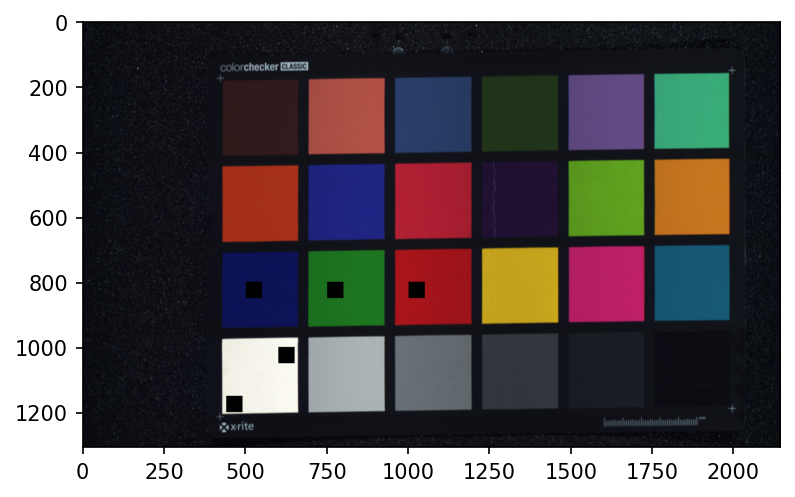

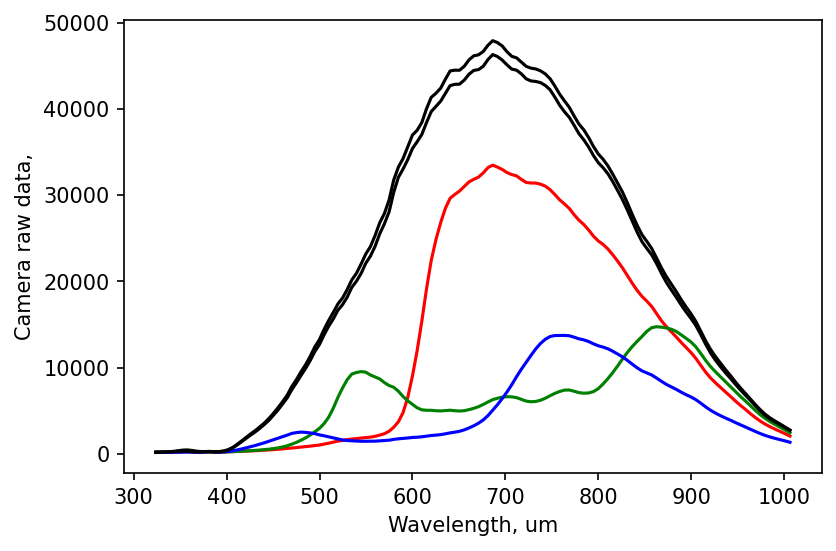

In [ ]:
# Select a palstic and life leaves
# Calcualte an average spectrum for the area 25x25 pixels and plot both spectra (live and plastic)
#del red, green, blue
RGB2 = RGB.copy()

##################################################################
# Select Red
x1 = 1000
x2 = 1050
y1 = 800
y2 = 850
RGB2[y1:y2,x1:x2,0] = 0
RGB2[y1:y2,x1:x2,1] = 0
RGB2[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
red = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select Blue
x1 = 500
x2 = 550
y1 = 800
y2 = 850
RGB2[y1:y2,x1:x2,0] = 0
RGB2[y1:y2,x1:x2,1] = 0
RGB2[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
blue = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select Green
x1 = 750
x2 = 800
y1 = 800
y2 = 850
RGB2[y1:y2,x1:x2,0] = 0
RGB2[y1:y2,x1:x2,1] = 0
RGB2[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
green = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))

##################################################################
# Select White
x1 = 440
x2 = 490
y1 = 1150
y2 = 1200
RGB2[y1:y2,x1:x2,0] = 0
RGB2[y1:y2,x1:x2,1] = 0
RGB2[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
white = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
# Select White
x1 = 600
x2 = 650
y1 = 1000
y2 = 1050
RGB2[y1:y2,x1:x2,0] = 0
RGB2[y1:y2,x1:x2,1] = 0
RGB2[y1:y2,x1:x2,2] = 0
sel = spectral_image[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
white2 = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
##################################################################
plt.rcParams['figure.dpi'] = 150
plt.imshow(RGB2)
plt.show()

plt.plot(waves, red, "r")
plt.plot(waves, green, "g")
plt.plot(waves, blue, "b")
plt.plot(waves, white, "black")
plt.plot(waves, white2, "black")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
#plt.ylabel('Reflectance [0-100]%')
plt.show()
###############################################






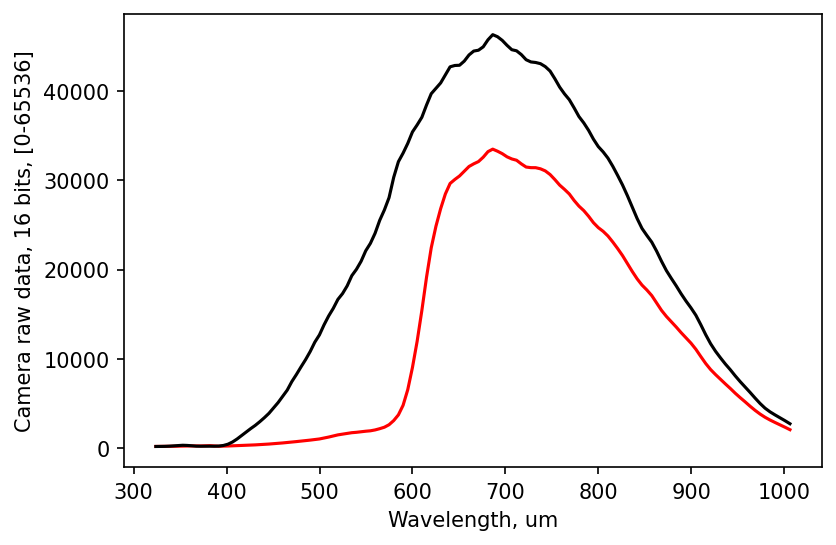

In [ ]:
# Plot red with white
plt.rcParams['figure.dpi'] = 150

plt.plot(waves, red, "r")
plt.plot(waves, white, "black")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data, 16 bits, [0-65536]')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

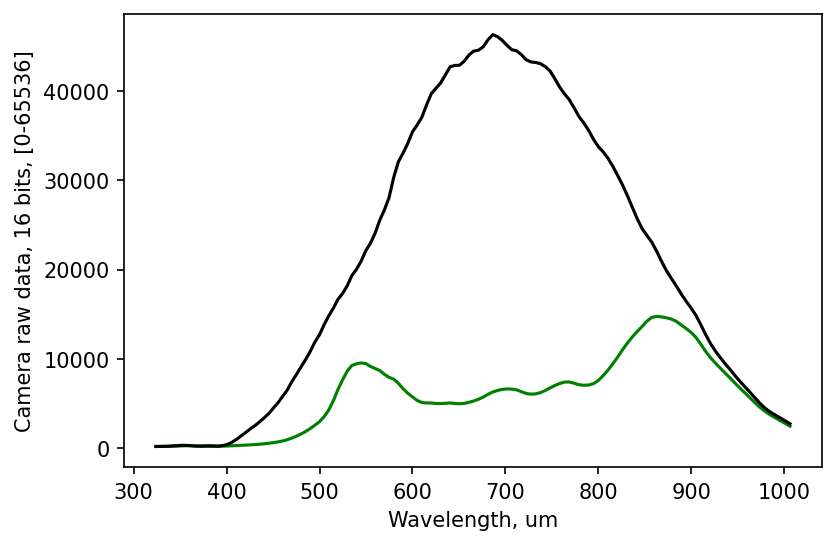

In [ ]:
# Plot green with white
plt.rcParams['figure.dpi'] = 150

plt.plot(waves, green, "g")
plt.plot(waves, white, "black")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data, 16 bits, [0-65536]')
#plt.ylabel('Reflectance [0-100]%')
plt.show()

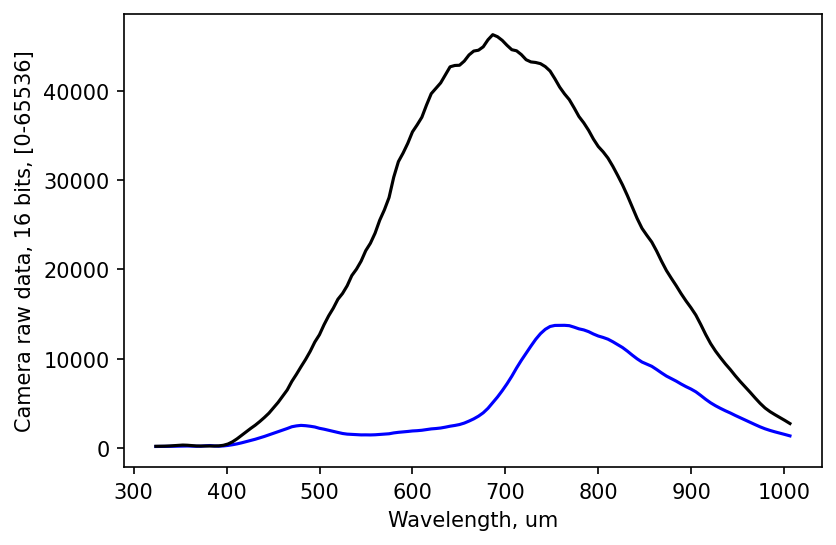

In [ ]:
# Plot blue  with white
plt.rcParams['figure.dpi'] = 150

plt.plot(waves, blue, "b")
plt.plot(waves, white, "black")

plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data, 16 bits, [0-65536]')

#plt.ylabel('Reflectance [0-100]%')
plt.show()

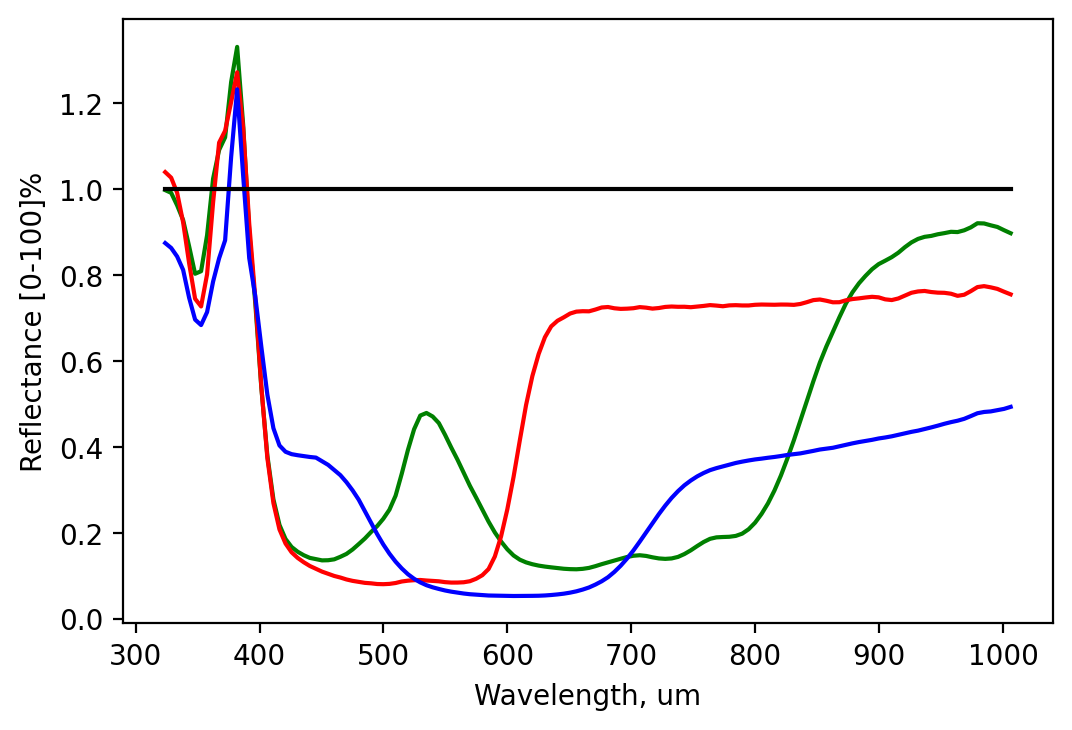

In [ ]:
# spectral_cube[i,:,:] = numpy.divide(upper_part[i,:,:], lower_part)
green_cor = green/white
red_cor = red/white
blue_cor = blue/white
white_cor = white/white
plt.rcParams['figure.dpi'] = 200

plt.plot(waves, green_cor, "g")
plt.plot(waves, red_cor, "r")
plt.plot(waves, blue_cor, "b")
plt.plot(waves, white_cor, "black")
plt.xlabel('Wavelength, um')
plt.ylabel('Camera raw data,')
plt.ylabel('Reflectance [0-100]%')
plt.show()

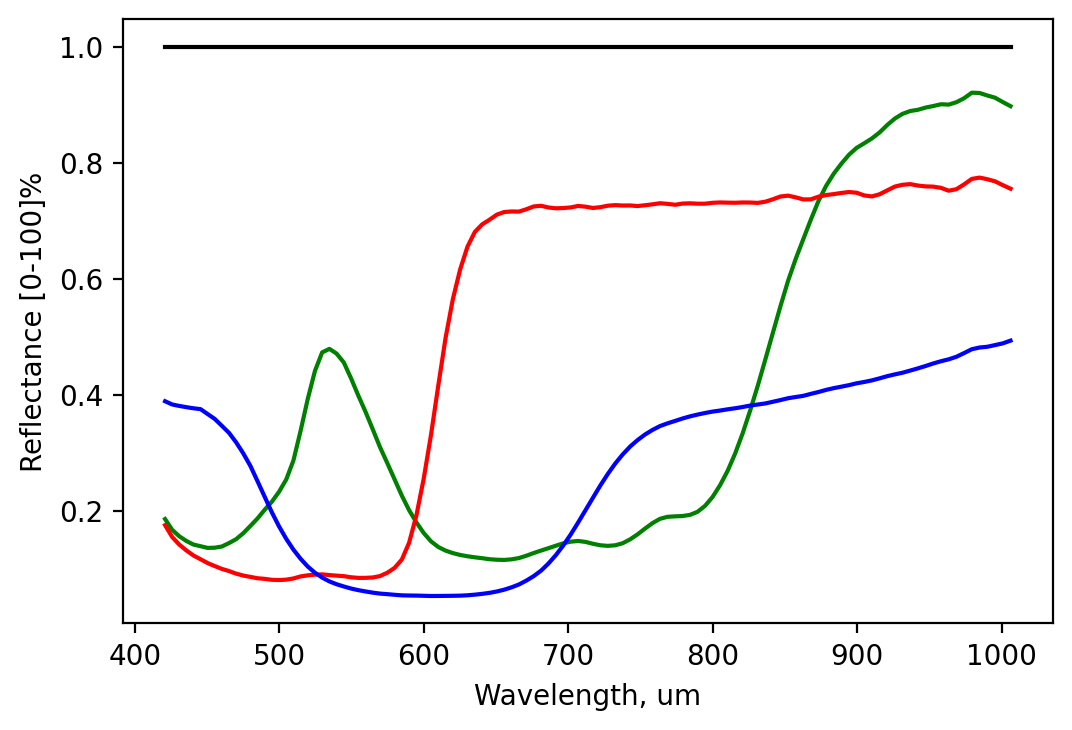

In [ ]:
b1 = 20
plt.plot(waves[b1:], green_cor[b1:], "g")
plt.plot(waves[b1:], red_cor[b1:], "r")
plt.plot(waves[b1:], blue_cor[b1:], "b")
plt.plot(waves[b1:], white_cor[b1:], "black")
plt.xlabel('Wavelength, um')
plt.ylabel('Reflectance [0-100]%')
plt.show()

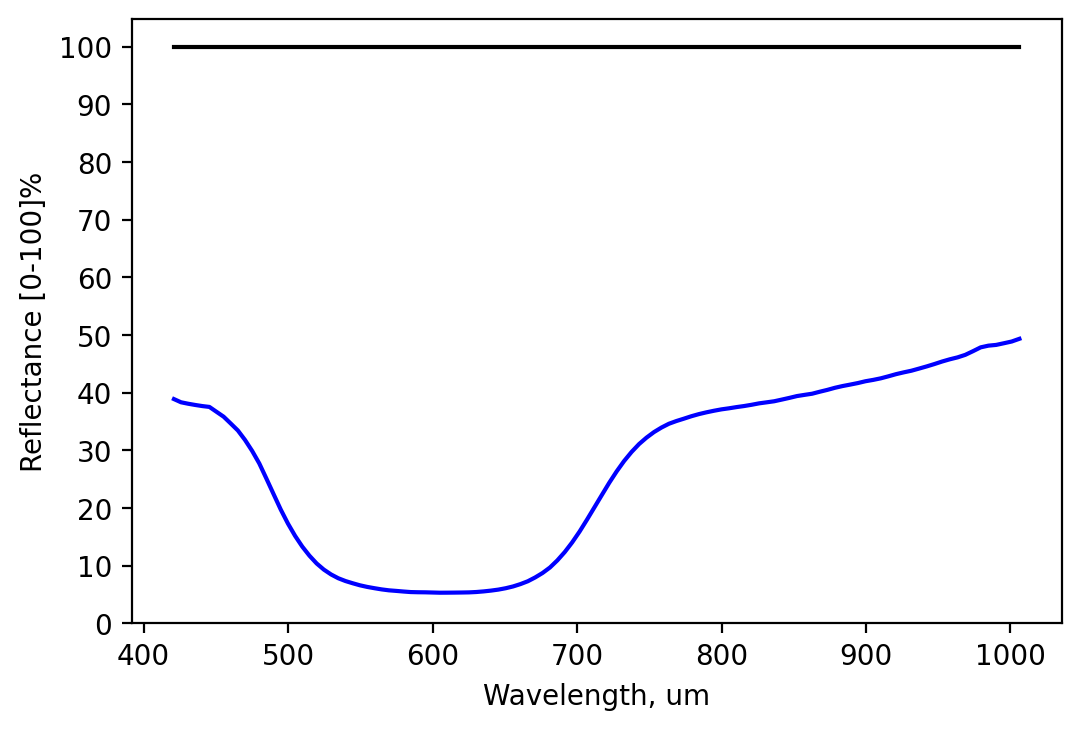

In [ ]:
b1 = 20
#plt.plot(waves[b1:], 100*red_cor[b1:], "r")
#plt.plot(waves[b1:], 100*green_cor[b1:], "g")
plt.plot(waves[b1:], 100*blue_cor[b1:], "b")
plt.plot(waves[b1:], 100*white_cor[b1:], "black")
plt.xlabel('Wavelength, um')
plt.yticks(range(0, 110, 10)) # set the range of y axis
plt.ylabel('Reflectance [0-100]%')

plt.show()

In [ ]:
# Correct all image
spectral_cube = np.empty((lines,bands,samples), dtype = np.float32)
for i in range(0,lines):
  for j in range(0,samples):
    spectral_cube[i,:,j] = spectral_image[i,:,j]/white #numpy.divide(spectral_image[i,:,j], white)



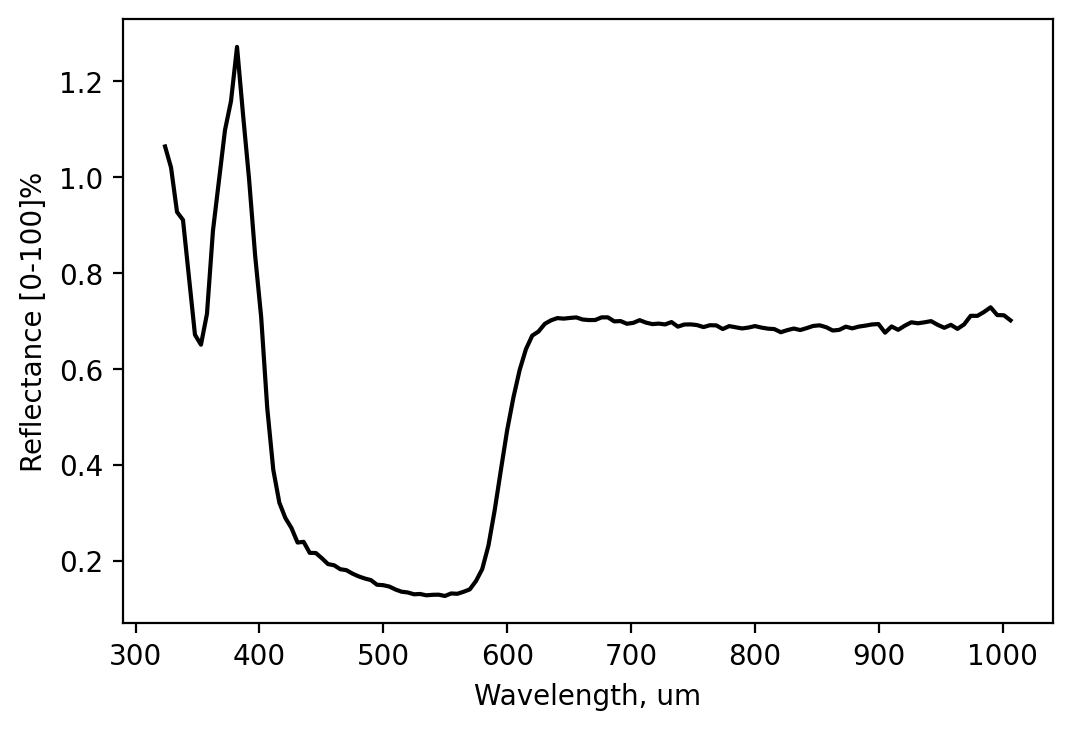

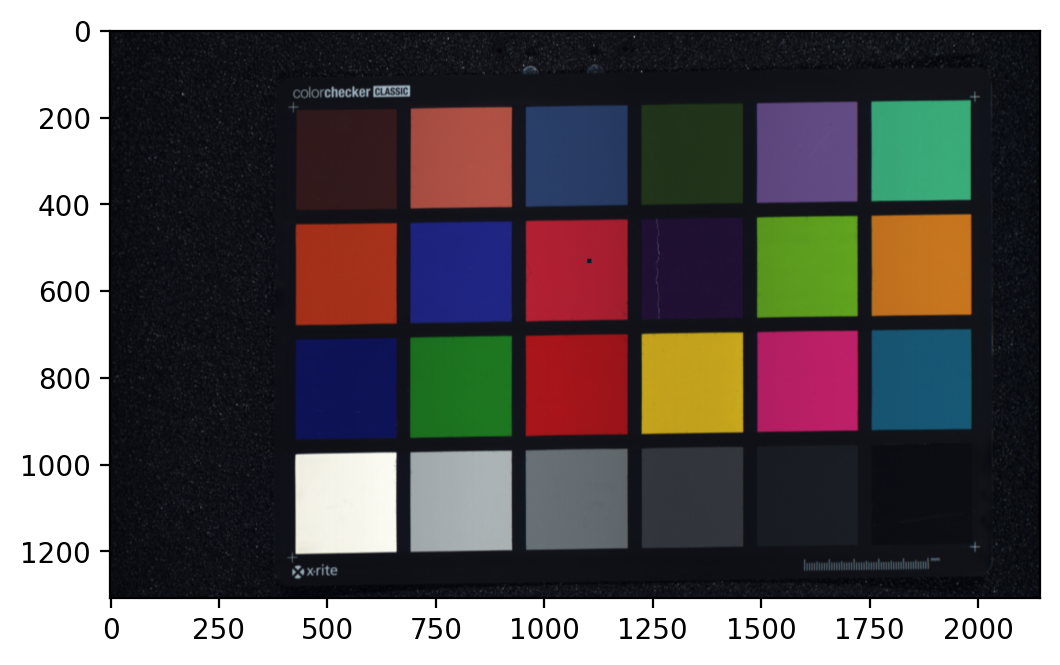

In [ ]:
y1 = 525
x1 = 1100 

plt.plot(waves, spectral_cube[y1,:,x1], "black")
plt.xlabel('Wavelength, um')
plt.ylabel('Reflectance [0-100]%')
plt.show()

RGB3 = RGB.copy()
RGB3[y1:y1+10,x1:x1+10,0]=0
plt.imshow(RGB3)
plt.show()